# Reading Data

In [257]:
import pandas as pd
data = pd.read_csv("clean.csv", index_col=[0])
data.head()
data.dtypes

po_/_so_#                        bool
asn/dn_#                         bool
country                         int64
fulfill_via                      bool
vendor_inco_term                int64
sub_classification              int64
unit_of_measure_(per_pack)      int64
line_item_quantity              int64
line_item_value               float64
pack_price                    float64
unit_price                    float64
first_line_designation           bool
freight_cost_(usd)            float64
shipment_mode                   int64
line_item_insurance_(usd)     float64
days_to_process                 int64
dtype: object

# Data Pre-Processing

In [258]:
# Data Preparation
X=data.drop(["line_item_value"],axis=1)
y=data["line_item_value"]

In [259]:
# Data Splitting
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=100)

In [260]:
import sklearn
sklearn.__version__

'1.3.1'

# Linear Regression

In [261]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [262]:
data_train_scaled=pd.DataFrame(scaled_train,columns=data.columns)
data_train_scaled

,po_/_so_#,asn/dn_#,country,fulfill_via,vendor_inco_term,sub_classification,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,first_line_designation,freight_cost_(usd),shipment_mode,line_item_insurance_(usd),days_to_process
0,1.0,1.0,0.525339,1.0,0.8,0.2,0.096990,0.000150,0.001486,0.164340,0.135385,1.0,0.027846,0.0,0.001373,0.511148
1,0.0,0.0,0.479657,0.0,0.6,0.2,0.096990,0.000680,0.005895,0.145621,0.120000,1.0,0.011002,0.0,0.002854,0.739130
2,1.0,1.0,0.732334,1.0,0.8,1.0,0.197324,0.022725,0.034551,0.025606,0.010769,1.0,0.015066,1.0,0.016737,0.788740
3,1.0,1.0,0.374019,1.0,0.8,0.2,0.197324,0.020618,0.019238,0.015714,0.006154,1.0,0.029541,1.0,0.014958,0.846711
4,1.0,1.0,0.525339,1.0,0.8,0.2,0.096990,0.019032,0.083131,0.073562,0.060000,0.0,0.021808,0.0,0.084444,0.649387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7756,0.0,0.0,1.000000,0.0,0.2,0.2,0.197324,0.023998,0.137737,0.096663,0.040000,1.0,0.000000,0.0,0.127196,0.527871
7757,0.0,0.0,0.479657,0.0,0.4,0.2,0.197324,0.013552,0.043379,0.053903,0.021538,1.0,0.079370,0.0,0.040061,0.598662
7758,1.0,1.0,0.231977,1.0,0.8,0.2,0.397993,0.000043,0.000570,0.211231,0.043077,0.0,0.021808,0.0,0.000378,0.675028
7759,1.0,1.0,0.286938,1.0,0.8,1.0,0.197324,0.002943,0.005573,0.031866,0.012308,0.0,0.021808,1.0,0.002699,0.698997


In [263]:
data_test_scaled=pd.DataFrame(scaled_test,columns=data.columns)
data_test_scaled

,po_/_so_#,asn/dn_#,country,fulfill_via,vendor_inco_term,sub_classification,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,first_line_designation,freight_cost_(usd),shipment_mode,line_item_insurance_(usd),days_to_process
0,1.0,1.0,0.374019,1.0,0.8,0.2,0.197324,0.010609,1.293710e-02,0.020535,0.007692,1.0,0.013255,1.000000,0.013143,0.795987
1,1.0,1.0,0.402570,1.0,0.8,1.0,0.096990,0.001293,1.646797e-03,0.021411,0.016923,1.0,0.002254,0.000000,0.001242,0.282609
2,1.0,1.0,0.402570,1.0,0.8,0.2,0.197324,0.019443,2.370739e-02,0.020535,0.007692,1.0,0.025706,0.000000,0.024084,0.672798
3,0.0,0.0,0.047109,0.0,0.4,0.2,0.197324,0.044155,3.692939e-02,0.014086,0.006154,0.0,0.021808,0.000000,0.021525,0.661093
4,1.0,1.0,0.076374,1.0,0.8,0.4,0.080268,0.000005,2.534314e-08,0.000063,0.000000,1.0,0.000612,1.000000,0.000000,0.389632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,1.0,1.0,0.732334,1.0,0.8,0.2,0.197324,0.058011,1.405949e-01,0.040819,0.016923,0.0,0.021808,1.000000,0.068097,0.846154
1937,0.0,0.0,0.479657,0.0,0.4,0.2,0.096990,0.043180,2.728611e-01,0.106430,0.087692,1.0,0.117766,0.000000,0.018723,0.069677
1938,0.0,0.0,0.479657,0.0,0.6,0.2,0.397993,0.009725,2.972041e-01,0.514618,0.104615,1.0,0.069057,0.000000,0.274459,0.706800
1939,0.0,0.0,1.000000,0.0,0.2,0.2,0.096990,0.218689,3.495353e-01,0.026920,0.021538,1.0,0.059256,0.666667,0.271733,0.775920


In [264]:
X_train=data_train_scaled.drop(["line_item_value"],axis=1)
y_train=data_train_scaled["line_item_value"]

X_test=data_test_scaled.drop(["line_item_value"],axis=1)
y_test=data_test_scaled["line_item_value"]

X_train.head()

,po_/_so_#,asn/dn_#,country,fulfill_via,vendor_inco_term,sub_classification,unit_of_measure_(per_pack),line_item_quantity,pack_price,unit_price,first_line_designation,freight_cost_(usd),shipment_mode,line_item_insurance_(usd),days_to_process
0,1.0,1.0,0.525339,1.0,0.8,0.2,0.096990,0.000150,0.164340,0.135385,1.0,0.027846,0.0,0.001373,0.511148
1,0.0,0.0,0.479657,0.0,0.6,0.2,0.096990,0.000680,0.145621,0.120000,1.0,0.011002,0.0,0.002854,0.739130
2,1.0,1.0,0.732334,1.0,0.8,1.0,0.197324,0.022725,0.025606,0.010769,1.0,0.015066,1.0,0.016737,0.788740
3,1.0,1.0,0.374019,1.0,0.8,0.2,0.197324,0.020618,0.015714,0.006154,1.0,0.029541,1.0,0.014958,0.846711
4,1.0,1.0,0.525339,1.0,0.8,0.2,0.096990,0.019032,0.073562,0.060000,0.0,0.021808,0.0,0.084444,0.649387


In [265]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [266]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [267]:
y_lr_train_pred

array([ 0.00933177,  0.01419224,  0.02774843, ...,  0.01585864,
        0.01876046, -0.00956163])

In [268]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [269]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [270]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.002385,0.92094,0.001969,0.924835


Text(0.5, 0, 'Actual line item value')

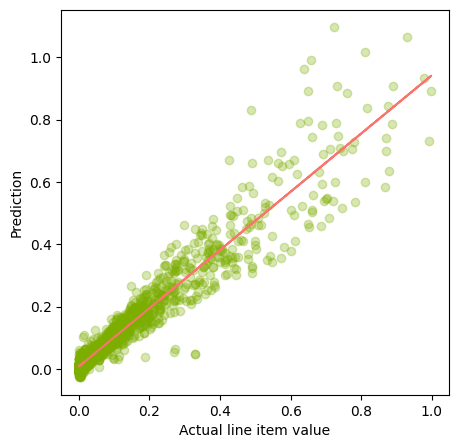

In [271]:
#Plotting
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_lr_test_pred, c="#7CAE00", alpha = 0.3)



z = np.polyfit(y_test, y_lr_test_pred, 1)
p = np.poly1d(z)

plt.plot(y_test, p(y_test), '#F8766D')
plt.ylabel('Prediction')
plt.xlabel('Actual line item value')

# Random Forest

In [272]:
#Data preparation
X_train=train.drop(["line_item_value"],axis=1)
y_train=train["line_item_value"]

X_test=test.drop(["line_item_value"],axis=1)
y_test=test["line_item_value"]

X_train.head()

,po_/_so_#,asn/dn_#,country,fulfill_via,vendor_inco_term,sub_classification,unit_of_measure_(per_pack),line_item_quantity,pack_price,unit_price,first_line_designation,freight_cost_(usd),shipment_mode,line_item_insurance_(usd),days_to_process
1755,True,True,737,True,4,1,30,67,26.25,0.88,True,4503.00,0,3.45,-209
3912,False,False,673,False,3,1,30,300,23.26,0.78,True,1779.09,0,7.17,200
9768,True,True,1027,True,4,5,60,10000,4.09,0.07,True,2436.32,3,42.05,289
8128,True,True,525,True,4,1,60,9073,2.51,0.04,True,4777.08,3,37.58,393
8973,True,True,737,True,4,1,30,8375,11.75,0.39,False,3526.69,0,212.16,39


In [273]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=20, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, random_state=100)

In [274]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [275]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [276]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [277]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,0.002385,0.92094,0.001969,0.924835
1,Random Forest,121422090.166532,0.997127,867620976.956001,0.976358


Text(0.5, 0, 'Actual line item value')

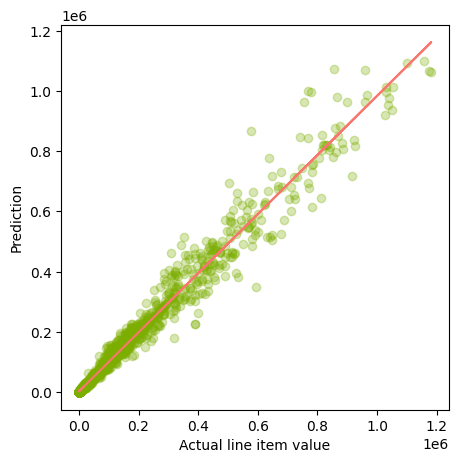

In [278]:
#Plotting
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_rf_test_pred, c="#7CAE00", alpha = 0.3)



z = np.polyfit(y_test, y_rf_test_pred, 1)
p = np.poly1d(z)

plt.plot(y_test, p(y_test), '#F8766D')
plt.ylabel('Prediction')
plt.xlabel('Actual line item value')

# Inference:
##  Random Forest is showing the best prediction.

# Training and Exporting the final model

In [279]:
new_rf = RandomForestRegressor(max_depth=20, random_state=100)
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
new_rf.fit(X, y)

RandomForestRegressor(max_depth=20, random_state=100)

In [280]:
import pickle
with open('trained_model-0.1.0.pkl', 'wb') as f:
    pickle.dump(new_rf, f)

In [282]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9702 entries, 1755 to 30
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   po_/_so_#                   9702 non-null   bool   
 1   asn/dn_#                    9702 non-null   bool   
 2   country                     9702 non-null   int64  
 3   fulfill_via                 9702 non-null   bool   
 4   vendor_inco_term            9702 non-null   int64  
 5   sub_classification          9702 non-null   int64  
 6   unit_of_measure_(per_pack)  9702 non-null   int64  
 7   line_item_quantity          9702 non-null   int64  
 8   pack_price                  9702 non-null   float64
 9   unit_price                  9702 non-null   float64
 10  first_line_designation      9702 non-null   bool   
 11  freight_cost_(usd)          9702 non-null   float64
 12  shipment_mode               9702 non-null   int64  
 13  line_item_insurance_(usd)   9702 non-

In [285]:
y.info()

<class 'pandas.core.series.Series'>
Index: 9702 entries, 1755 to 30
Series name: line_item_value
Non-Null Count  Dtype  
--------------  -----  
9702 non-null   float64
dtypes: float64(1)
memory usage: 151.6 KB


In [286]:
X

,po_/_so_#,asn/dn_#,country,fulfill_via,vendor_inco_term,sub_classification,unit_of_measure_(per_pack),line_item_quantity,pack_price,unit_price,first_line_designation,freight_cost_(usd),shipment_mode,line_item_insurance_(usd),days_to_process
1755,True,True,737,True,4,1,30,67,26.25,0.88,True,4503.00,0,3.45,-209
3912,False,False,673,False,3,1,30,300,23.26,0.78,True,1779.09,0,7.17,200
9768,True,True,1027,True,4,5,60,10000,4.09,0.07,True,2436.32,3,42.05,289
8128,True,True,525,True,4,1,60,9073,2.51,0.04,True,4777.08,3,37.58,393
8973,True,True,737,True,4,1,30,8375,11.75,0.39,False,3526.69,0,212.16,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8868,True,True,1027,True,4,1,60,25526,6.52,0.11,False,3526.69,3,171.09,392
660,False,False,673,False,2,1,30,19000,17.00,0.57,True,19044.32,0,47.04,-1001
2974,False,False,673,False,3,1,120,4280,82.20,0.68,True,11167.45,0,689.56,142
5613,False,False,1402,False,1,1,30,96224,4.30,0.14,True,9582.53,2,682.71,266


In [288]:
y

1755      1758.75
3912      6978.00
9768     40900.00
8128     22773.23
8973     98406.25
          ...    
8868    166429.52
660     323000.00
2974    351816.00
5613    413763.20
30      270000.00
Name: line_item_value, Length: 9702, dtype: float64